<a href="https://colab.research.google.com/github/Lenakirara/analise-exploratoria-python/blob/master/an%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória

Usando a planilha de base de dados de vendas de produtos. Essa base de dados fictícia é fornecida pela microsoft para análise.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# estilo que será usado
plt.style.use("seaborn")
pd.options.display.float_format = '{:20,.2f}'.format

In [28]:
# buscando arquivo
from google.colab import files
fl = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [29]:
df = pd.read_excel('AdventureWorks.xlsx')

In [30]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [31]:
df.shape

(904, 16)

In [32]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [33]:
# verificando total da receita
df['Valor Venda'].sum()

5984606.1426

In [34]:
# coluna custo - criar
df['custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [35]:
# buscar colunas - verificar coluna 'custo'
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor', 'custo'],
      dtype='object')

In [36]:
df['custo'].sum()

2486783.05

In [37]:
# verificar o lucro
# criar coluna 'lucro'
df['lucro'] = df['Valor Venda'] - df['custo']

In [38]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [39]:
# lucro total
df['lucro'].sum()

3497823.0926

In [40]:
# verificar tempo que levou para enviar x produto
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [41]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


In [42]:
# transformar str em inteiro
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [43]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [44]:
df['Tempo Envio'].dtype

dtype('int64')

In [46]:
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [47]:
# verificando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo Envio       0
dtype: int64

In [48]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [49]:
# formato colunar - resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [52]:
# total produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

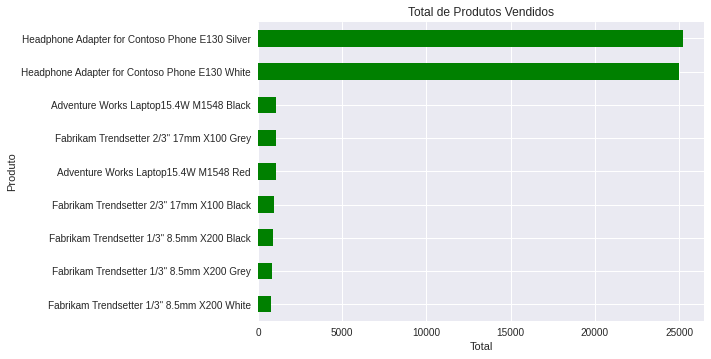

In [54]:
df.groupby('Produto')["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos Vendidos', color='green')
plt.xlabel('Total')
plt.ylabel('Produto');

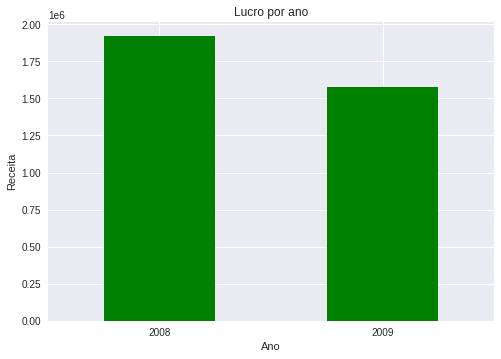

In [64]:
# verificar lucro por ano
df.groupby(df['Data Venda'].dt.year)['lucro'].sum().plot.bar(title='Lucro por ano', color='green')
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.xticks(rotation='horizontal');

In [57]:
df.groupby(df['Data Venda'].dt.year)['lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [58]:
# verificar venda em dterminado ano
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [60]:
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo Envio
334,2009-01-13,2009-01-20,307,384,19113,200901133CS680,348.58,758.00,9,"1,023.30","5,798.70",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"3,137.22","2,661.48",7
380,2009-12-27,2010-01-04,199,1202,19034,200912274CS950,330.66,998.00,14,"2,794.40","11,177.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"4,629.24","6,548.36",8
146,2009-06-16,2009-06-25,199,366,18955,200906163CS866,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"2,091.48","2,456.52",9
442,2009-02-06,2009-02-12,306,1155,19062,200902064CS737,324.69,980.00,14,960.40,"12,759.60",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"4,545.66","8,213.94",6
436,2009-11-10,2009-11-14,307,366,19140,200911103CS730,348.58,758.00,9,"1,023.30","5,798.70",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"3,137.22","2,661.48",4


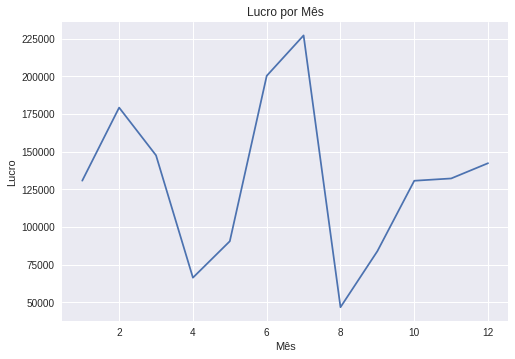

In [61]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro por Mês')
plt.xlabel('Mês')
plt.ylabel("Lucro");

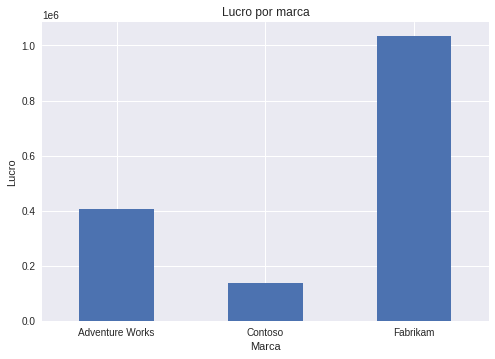

In [63]:
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title='Lucro por marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

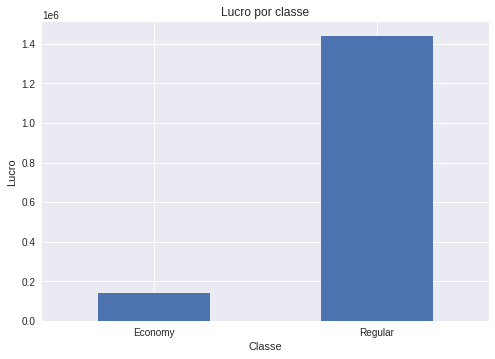

In [65]:
# lucro por classe
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title='Lucro por classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [67]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

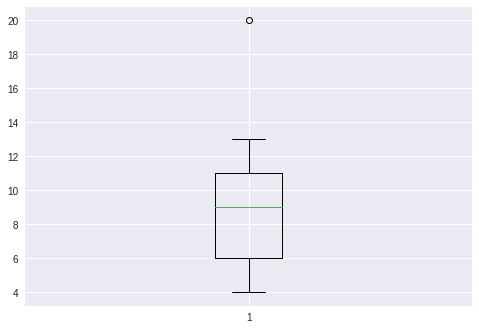

In [69]:
plt.boxplot(df['Tempo Envio']);

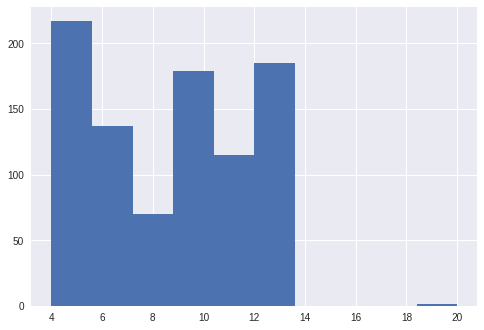

In [71]:
# histograma
plt.hist(df['Tempo Envio']);

In [72]:
df['Tempo Envio'].min()

4

In [73]:
df['Tempo Envio'].max()

20

In [74]:
# verificando outlier
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [75]:
# salvar um novo csv
df.to_csv('df_novo.cvs', index=False)